In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving fcc-forum-pageviews.csv to fcc-forum-pageviews.csv
User uploaded file "fcc-forum-pageviews.csv" with length 22381 bytes


In [4]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

# Clean data
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) &
            (df['value'] <= df['value'].quantile(0.975))]


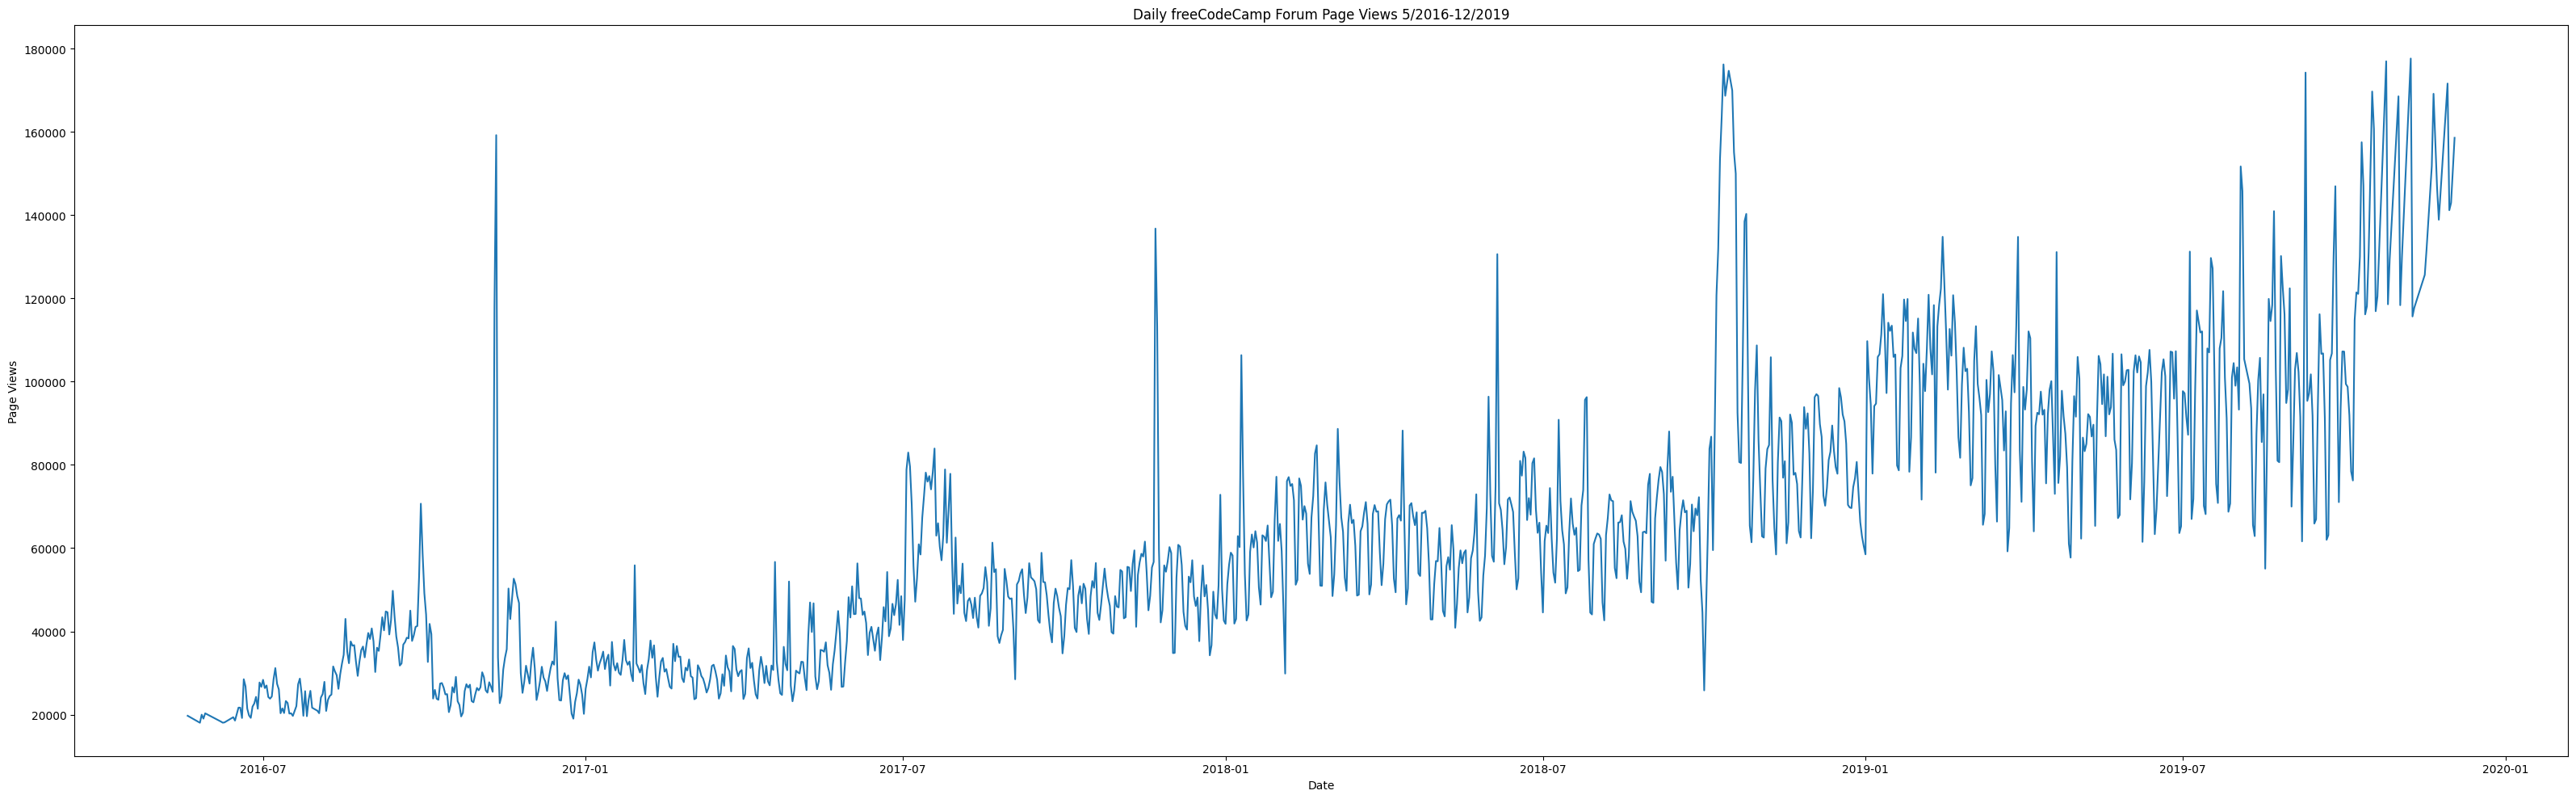

In [5]:
# Draw line plot
fig, ax = plt.subplots(figsize=(32, 10), dpi=100)
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
sns.lineplot(data=df, legend=False)
plt.tight_layout()

# Save image and return fig (don't change this part)
fig.savefig('line_plot.png')
# return fig

<ipython-input-6-1d8452cd5f71>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_bar = pd.DataFrame(df_bar.groupby(['year', 'month']).mean())
<ipython-input-6-1d8452cd5f71>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_bar = df_bar.pivot('year', 'month', 'value')


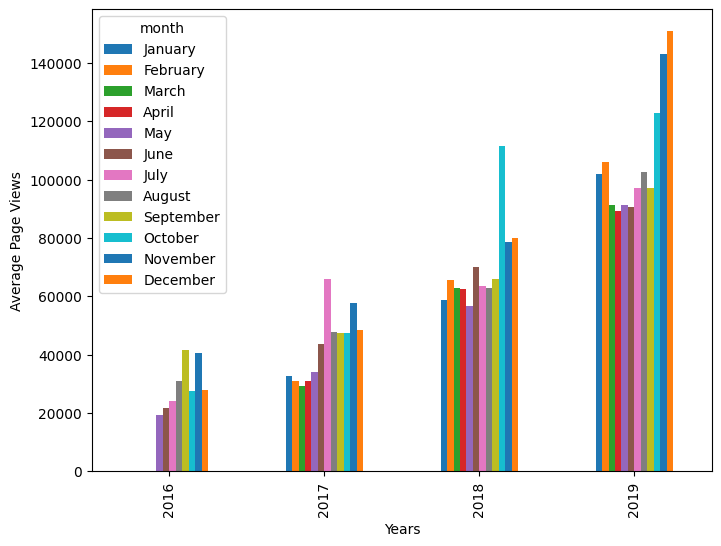

In [6]:
# Copy and modify data for monthly bar plot
df_bar = df.copy()
df_bar.reset_index(inplace=True)
df_bar['year'] = pd.DatetimeIndex(df_bar['date']).year
df_bar['month'] = pd.DatetimeIndex(df_bar['date']).month_name()
df_bar = pd.DataFrame(df_bar.groupby(['year', 'month']).mean())
df_bar.reset_index(inplace=True)
df_bar['month'] = pd.to_datetime(df_bar['month'], format='%B')
df_bar = df_bar.pivot('year', 'month', 'value')
df_bar.columns = df_bar.columns.strftime('%B')

# Draw bar plot
fig = df_bar.plot.bar(figsize=(8, 6)).figure
plt.xlabel('Years')
plt.ylabel('Average Page Views')

# Save image and return fig (don't change this part)
fig.savefig('bar_plot.png')
# return fig

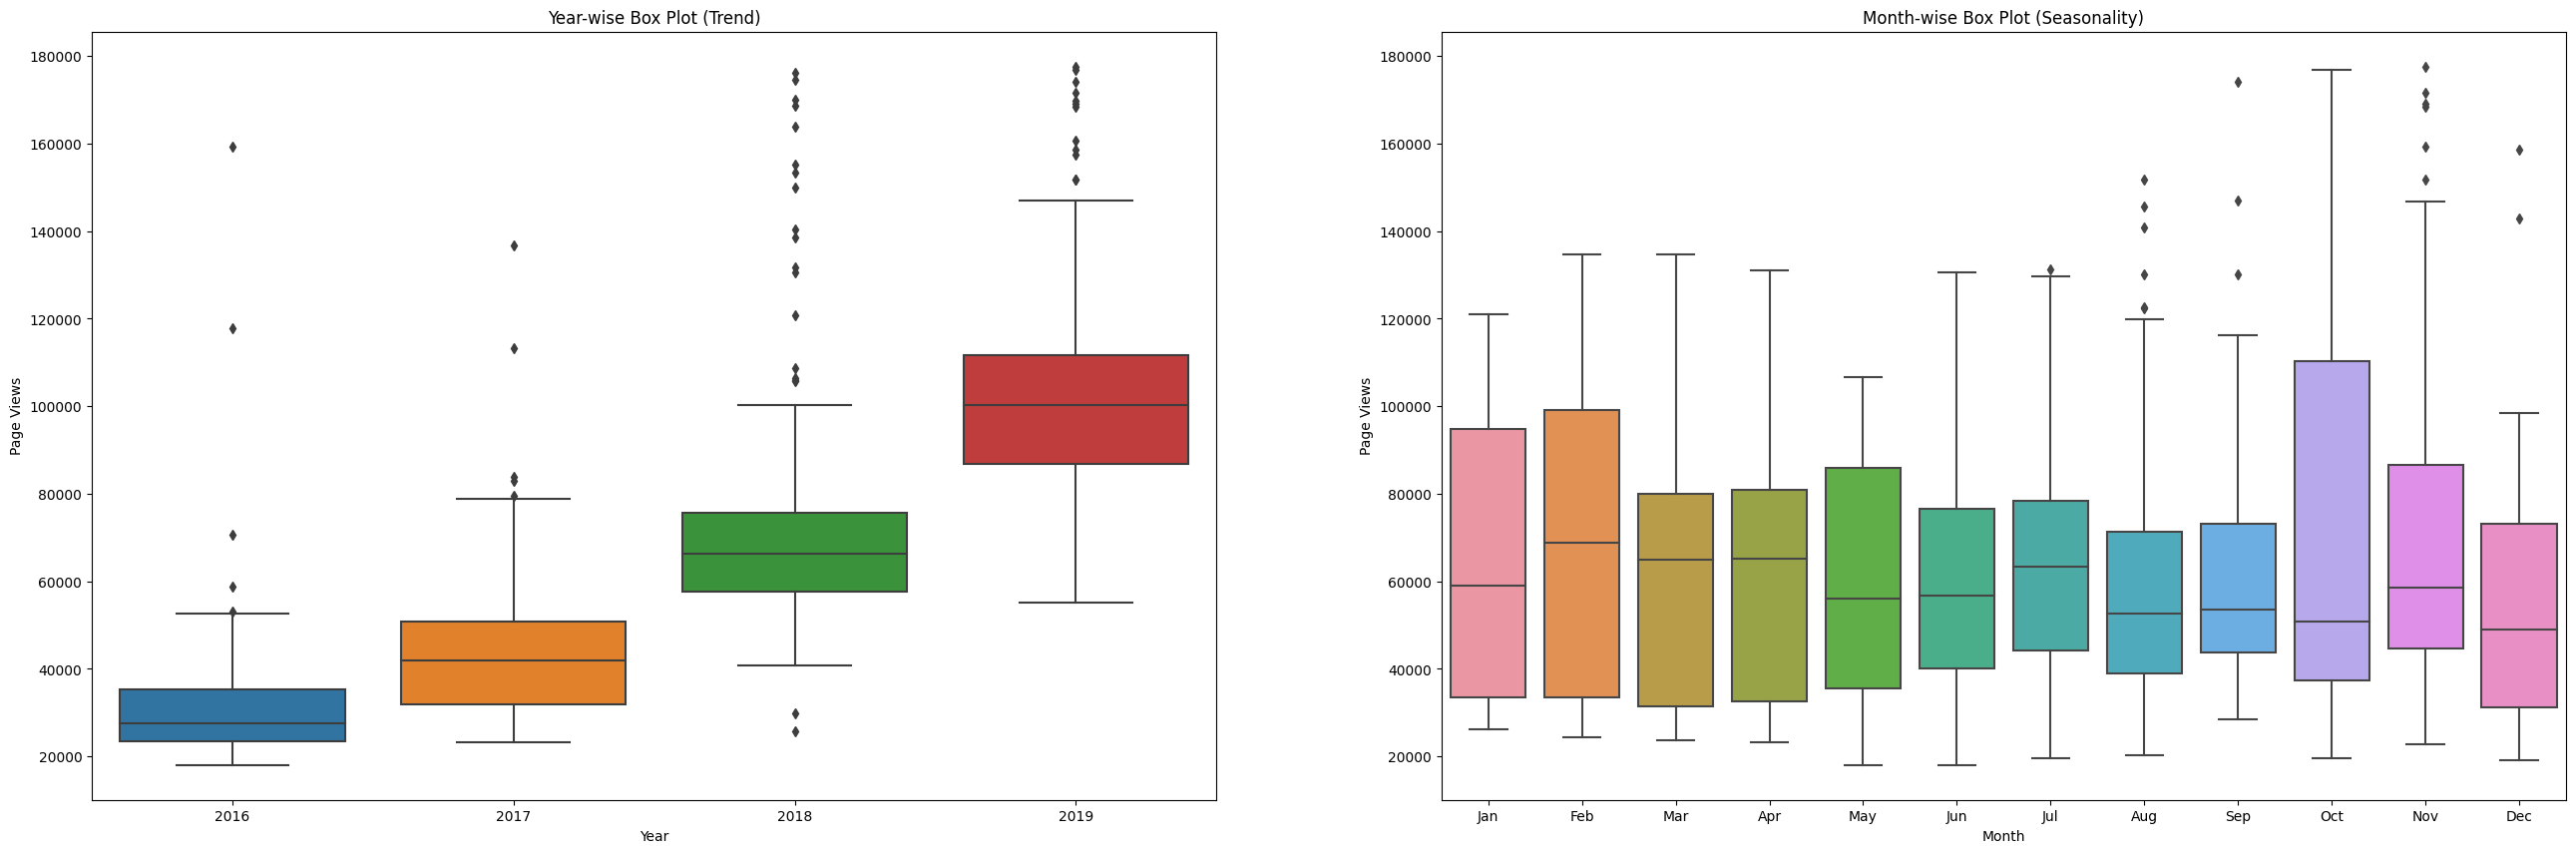

In [7]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

# Draw box plots (using Seaborn)
fig, axes = plt.subplots(1,2,figsize=(32,10), dpi=100)

sns.boxplot(data=df_box, x='year', y='value', ax=axes[0])
axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')

months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sns.boxplot(data=df_box, x='month', y='value', order=months, ax=axes[1])
axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')

# Save image and return fig (don't change this part)
fig.savefig('box_plot.png')
# return fig